In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("2019-01-01-CICO.csv")
data.head()

,AliasNo,TokenNo,Check In Station ID,Station,CheckIn TurnStile ID,PlatForm,Check In DateTime,Check Out Station ID,Station.1,CheckOut TurnStile ID,PlatForm.1,CheckOut DateTime
0,120000045,1111500000297816,33031.0,Shaheed-e-Milat,13036.0,Shaheed-e-Milat Entry 3,1/1/2019 1:22:42 PM,33081.0,Ibn-e-Sina,13521.0,Ibn-Sina Exit 2,1/1/2019 1:34:44 PM
1,120000045,1111500000297816,33081.0,Ibn-e-Sina,13021.0,Ibn-Sina Entry 2,1/1/2019 7:43:10 AM,33031.0,Shaheed-e-Milat,13536.0,Shaheed-e-Milat Exit 3,1/1/2019 7:56:38 AM
2,120000108,1111500000297197,34051.0,Waris Khan,14014.0,Waris Khan Entry 3,1/1/2019 2:09:39 PM,33061.0,PIMS,13525.0,PIMS Exit 1,1/1/2019 2:40:40 PM
3,120000116,1111500000297119,34011.0,Saddar,14001.0,Saddar Entry 1,1/1/2019 11:23:09 AM,34041.0,Committee Chowk,14510.0,Committee Chowk Exit 2,1/1/2019 11:32:40 AM
4,120000116,1111500000297119,34041.0,Committee Chowk,14010.0,Committee Chowk Entry 2,1/1/2019 8:51:58 AM,34011.0,Saddar,14502.0,Saddar Exit 2,1/1/2019 8:59:40 AM


In [3]:
data = pd.DataFrame(data)
data = data.rename(columns={"PlatForm": "InStationPlatform", "Station": "InStation", "Station.1": "OutStation", "PlatForm.1": "OutStationPlatform"})
data

,AliasNo,TokenNo,Check In Station ID,InStation,CheckIn TurnStile ID,InStationPlatform,Check In DateTime,Check Out Station ID,OutStation,CheckOut TurnStile ID,OutStationPlatform,CheckOut DateTime
0,120000045,1111500000297816,33031.0,Shaheed-e-Milat,13036.0,Shaheed-e-Milat Entry 3,1/1/2019 1:22:42 PM,33081.0,Ibn-e-Sina,13521.0,Ibn-Sina Exit 2,1/1/2019 1:34:44 PM
1,120000045,1111500000297816,33081.0,Ibn-e-Sina,13021.0,Ibn-Sina Entry 2,1/1/2019 7:43:10 AM,33031.0,Shaheed-e-Milat,13536.0,Shaheed-e-Milat Exit 3,1/1/2019 7:56:38 AM
2,120000108,1111500000297197,34051.0,Waris Khan,14014.0,Waris Khan Entry 3,1/1/2019 2:09:39 PM,33061.0,PIMS,13525.0,PIMS Exit 1,1/1/2019 2:40:40 PM
3,120000116,1111500000297119,34011.0,Saddar,14001.0,Saddar Entry 1,1/1/2019 11:23:09 AM,34041.0,Committee Chowk,14510.0,Committee Chowk Exit 2,1/1/2019 11:32:40 AM
4,120000116,1111500000297119,34041.0,Committee Chowk,14010.0,Committee Chowk Entry 2,1/1/2019 8:51:58 AM,34011.0,Saddar,14502.0,Saddar Exit 2,1/1/2019 8:59:40 AM
...,...,...,...,...,...,...,...,...,...,...,...,...
139813,3500640866,1111703500640866,33093.0,Chaman,13017.0,Chaman Entry 2,1/1/2019 7:47:26 PM,34021.0,Marrir Chowk,14505.0,Marrir Chowk Exit 2,1/1/2019 8:21:50 PM
139814,3500640866,1111703500640866,34011.0,Saddar,14001.0,Saddar Entry 1,1/1/2019 1:16:04 PM,34031.0,Liaqat Bagh,14506.0,Liaqat Bagh Exit 1,1/1/2019 1:22:50 PM
139815,3500640866,1111703500640866,34031.0,Liaqat Bagh,14006.0,Liaqat Bagh Entry 1,1/1/2019 4:03:13 PM,34041.0,Committee Chowk,14509.0,Committee Chowk Exit 1,1/1/2019 4:07:56 PM
139816,3500640866,1111703500640866,34041.0,Committee Chowk,14010.0,Committee Chowk Entry 2,1/1/2019 10:33:58 AM,34011.0,Saddar,14503.0,Saddar Exit 3,1/1/2019 10:42:48 AM


In [4]:
trips_raw = data.groupby(by=['InStation','OutStation']).count()[['TokenNo']].rename(columns={"TokenNo":"Counts"}).reset_index()
Trips = trips_raw.sort_values(by="Counts", ascending = False )
Trips

,InStation,OutStation,Counts
139,Faizabad,Saddar,3294
461,Saddar,Faizabad,2781
523,Shamsabad,Saddar,1642
477,Saddar,Shamsabad,1591
451,Rehmanabad,Saddar,1528
...,...,...,...
254,Katchery,PIMS,11
404,Parade Ground,Shaheed-e-Milat,9
155,Fayz Ahmad Fayz,Khyaban-e-Johar,7
56,Chaman,Ibn-e-Sina,7


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
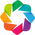

In [5]:
import warnings
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
# from channels import http
from channels.http import AsgiHandler
hv.extension("bokeh")
hv.output(size = 200)

In [6]:
%%opts Chord [height=350 width=350 title="Traffic Movement Between Stations of PMBS" ]
chord = hv.Chord(Trips)
print(chord)

:Chord   [InStation,OutStation]   (Counts)


In [7]:
Stations = list(set(Trips['InStation'].unique().tolist() + Trips['OutStation'].unique().tolist()))
Stations_Dataset = hv.Dataset(pd.DataFrame(Stations, columns=["Stations_Names"]))

In [8]:
%%opts Chord [height=350 width=350 title="Ridership Summary of PMBS" labels="Stations_Names"]
%%opts Chord (node_color="Trips" node_cmap="Category20" edge_color="OutStation" edge_cmap='Category10')
hv.Chord((Trips, Stations_Dataset))

:Chord   [InStation,OutStation]   (Counts)

In [9]:
# Save the Chord plot as an HTML file
hv.save(chord, 'ridership_chord.html', backend='bokeh')

print("Chord plot has been saved as 'ridership_chord.html'.")

Chord plot has been saved as 'ridership_chord.html'.


In [ ]:
import pandas as pd
import numpy as np
import holoviews as hv
from holoviews import opts

# Initialize Holoviews with Bokeh extension
hv.extension("bokeh")
hv.output(size=200)

# Load and preprocess data
data = pd.read_csv("2019-01-01-CICO.csv")
data = data.rename(columns={"PlatForm": "InStationPlatform", "Station": "InStation", 
                            "Station.1": "OutStation", "PlatForm.1": "OutStationPlatform"})

# Prepare the Trips DataFrame
trips_raw = data.groupby(by=['InStation', 'OutStation']).count()[['TokenNo']].rename(columns={"TokenNo": "Counts"}).reset_index()
Trips = trips_raw.sort_values(by="Counts", ascending=False)

# Prepare the list of unique stations
Stations = list(set(Trips['InStation'].unique().tolist() + Trips['OutStation'].unique().tolist()))
Stations_Dataset = hv.Dataset(pd.DataFrame(Stations, columns=["Stations_Names"]))

# Create the Chord plot with properly defined nodes and edges
chord = hv.Chord((Trips, Stations_Dataset)).opts(
    opts.Chord(
        height=350, width=350, title="Ridership Summary of PMBS", labels='Stations_Names',
        node_color=dim('Stations_Names').str(), node_cmap="Category20", 
        edge_color=dim('OutStation').str(), edge_cmap='Category10',
        edge_alpha=0.6, node_size=10
    )
)

# Save the Chord plot as an HTML file
hv.save(chord, 'ridership_chord.html', backend='bokeh')

print("Chord plot has been saved as 'ridership_chord.html'.")
